# Week 11 - Neural Networks
In this assignment, I will:

* Load the MNIST data set.
* Display the first five images in the training data set. Compare these to the first five training labels.
* Build and train a Keras CNN classifier on the MNIST training set.
* Report the test accuracy of your model.
* Display a confusion matrix on the test set classifications.
* Summarize your results.

In [1]:
# importing necessary packages
from keras.datasets import mnist
from keras import models
import cv2
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

# loading the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2023-11-08 14:29:24.111420: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Print the first 5 images

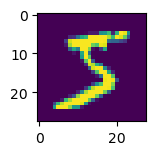

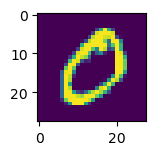

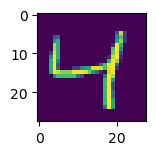

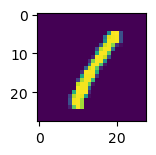

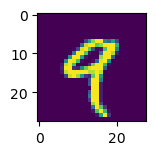

In [3]:
for i in range(5):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
    plt.show()

In [4]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

The train_x contains the pictures and train_y has the correct corresponding labels to the integers pictured in the training data.

In [5]:
# one-hot encode the y variables
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# normalize the data
x_train = x_train / 255
x_test = x_test / 255

# reshape the data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

#### Build and train a Keras CNN classifier on the MNIST training set.

In [6]:
# create the model
model = Sequential()

# layers
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Report the test accuracy of the model.

In [7]:
# train the model
model.fit(x_train, y_train, epochs=10, batch_size=1024)

model.evaluate(x_test, y_test)

Epoch 1/10
59/59 [==============================] - 2s 15ms/step - loss: 0.8422 - accuracy: 0.7613
Epoch 2/10
59/59 [==============================] - 1s 16ms/step - loss: 0.2901 - accuracy: 0.9156
Epoch 3/10
59/59 [==============================] - 1s 15ms/step - loss: 0.2180 - accuracy: 0.9367
Epoch 4/10
59/59 [==============================] - 1s 15ms/step - loss: 0.1747 - accuracy: 0.9497
Epoch 5/10
59/59 [==============================] - 1s 15ms/step - loss: 0.1484 - accuracy: 0.9575
Epoch 6/10
59/59 [==============================] - 1s 15ms/step - loss: 0.1262 - accuracy: 0.9631
Epoch 7/10
59/59 [==============================] - 1s 15ms/step - loss: 0.1099 - accuracy: 0.9674
Epoch 8/10
59/59 [==============================] - 1s 15ms/step - loss: 0.0974 - accuracy: 0.9715
Epoch 9/10
59/59 [==============================] - 1s 17ms/step - loss: 0.0870 - accuracy: 0.9745
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0834 - accuracy: 0.9742


[0.08335509896278381, 0.9742000102996826]

#### Display a confusion matrix on the test set classifications.

In [8]:
y_pred = model.predict(x_test)

import numpy as np
# convert one-hot encoded labels back to integer labels
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# compute the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

print(matrix)

313/313 [==============================] - 1s 2ms/step
[[ 968    0    2    0    1    1    4    1    2    1]
 [   0 1124    2    2    0    1    1    1    4    0]
 [   5    2 1004    1    4    0    5    4    7    0]
 [   0    0    5  988    0    3    0    6    7    1]
 [   2    0    4    0  951    0    5    2    3   15]
 [   2    0    0   12    2  854    9    0   10    3]
 [   5    3    0    1    3    4  937    0    5    0]
 [   1    8   10    0    1    0    0 1000    1    7]
 [   7    0    3    6    4    2    2    3  946    1]
 [   3    4    0    8   11    1    1    5    6  970]]


### Summarize the Results
After loading in the MNIST dataset, I normalized the x_train and x_test data and one-hot encoded the y_train and y_test variables. This ensures less errors when compiling the model. I then began layering the neural network model, choosing to do 4 layers, and ran with 10 epochs and 512 batch size. This turned out to be a 97% accurate model. 